<a href="https://colab.research.google.com/github/nmamie/ML4H_Project1/blob/master/ML4H_Project1_Task1_Nici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Heart Disease Prediction**

## Preparation

In [1]:
## basic packages
import pandas as pd
import numpy as np
import math
from IPython.display import display

In [2]:
## setup
import warnings
warnings.filterwarnings("ignore")

path = "/content/drive/MyDrive/1) ETH/3) ML in Healthcare/5) Assignments/Project 1/Data Heart Failure/"

In [3]:
## data import
train_data = pd.read_csv(path + "train_val_split.csv")
test_data = pd.read_csv(path + "test_split.csv")

## **Q1: Exploratory Data Analysis**

### Basic checks

In [ ]:
## examine head
train_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [ ]:
## check dataset sample size & dimensionality
n = len(train_data)
p = len(train_data.columns) - 1
print("No. of samples:  ", n)
print("No. of features: ", p)

No. of samples:   734
No. of features:  11


In [ ]:
## check for missing data
train_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Conclusions:**
*   We have significantly more observations than variables. Hence, no further problems arise.
*   There are no missing values.

**Implications:**
*   None

### Data types and distributions of variables

In [ ]:
## explore feature data types
train_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object

*FastingBS* and *HeartDisease* are binary, hence change to data type "object" for plotting.

In [4]:
## change data type of categorical variables to "object"
train_data["FastingBS"] = train_data["FastingBS"].astype("object")
train_data["HeartDisease"] = train_data["HeartDisease"].astype("object")

In [5]:
# save variable & names
var_names = train_data.columns.tolist()
fts_names = train_data.drop("HeartDisease", axis=1).columns.tolist()
num_fts = train_data.drop("HeartDisease", axis=1).select_dtypes(exclude="object").columns.tolist()
cat_fts = train_data.drop("HeartDisease", axis=1).select_dtypes(include="object").columns.tolist()
num_vars = train_data.select_dtypes(include="int64").columns.tolist()
cat_vars = train_data.select_dtypes(include="object").columns.tolist()

In [6]:
# summary statistics
display(train_data[num_fts].describe().round(2))
display(train_data[cat_fts].describe())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,734.00,734.00,734.00,734.00,734.00
mean,53.52,132.06,197.59,136.17,0.87
std,9.42,18.62,108.98,25.33,1.08
min,29.00,0.00,0.00,60.00,-2.00
25%,47.00,120.00,172.25,120.00,0.00
50%,54.00,130.00,222.00,138.00,0.50
75%,60.00,140.00,267.00,155.00,1.50
max,77.00,200.00,529.00,195.00,6.20


,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,734,734,734,734,734,734
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,573,381,563,440,439,364


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# categorical features
fig, axs = plt.subplots(2, math.ceil(len(cat_fts)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(cat_fts):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=col, data=train_data, ax=ax)

# numerical features
fig, axs = plt.subplots(2, math.ceil(len(num_fts)/2), figsize=(15, 10))
fig.suptitle('Numerical Features', fontsize=16)
for i, col in enumerate(num_fts):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.histplot(x=col, data=train_data, ax=ax)

In [ ]:
print("0s in RestingBP:")
print(" - Train Data: ", (train_data["RestingBP"] == 0).sum())
print(" - Test Data:  ", (test_data["RestingBP"] == 0).sum())

print("")
print("0s in RestingBP:")
print(" - Train Data: ", (train_data["Cholesterol"] == 0).sum())
print(" - Test Data:  ", (test_data["Cholesterol"] == 0).sum())

0s in RestingBP:
 - Train Data:  1
 - Test Data:   0

0s in RestingBP:
 - Train Data:  141
 - Test Data:   31


**Conclusions:**

1.   Some features are categorical, i.e. lack interpretability of differences in or ordering of their values.
2.   The dataset is imbalanced w.r.t. a couple of features, incl. *sex*, *chest pain type*, and *fasting blood sugar*. Importantly, however, the dataset is balanced w.r.t. the outcome variable, *heart disease*.
3.   *Cholesterol:* Many values of are exactly 0. Since virtually all values above 0 are >100, this seems highly unrealistic. Instead, we interpret this as missing values.
4.   *RestingBP:* There exist an observation with resting blood pressure of 0, which seems equally unrealistic. 

**Implications:**

1.   Create dummy variables or use one-hot encoding for the respective features.
2.  ...
3.   Since there are many observations with this anomaly, create a dummy variable indicating whether a patient's cholesterol measurement is missing or not.
4.   Since there is only 1 observation with this anomaly, ...

## EDA Preprocessing

For the purpose of EDA, our preprocessing pipeline consists of the following steps:

1.   Create dummy variable for *Cholesterol = 0*
2.   Mark *Cholesterol* as *NA* whenever it is 0
2.   Create dummy variables for categories

The corresponding dataset is called "train_proc_1"/"test_proc_1"

In [6]:
## add dummy for cholesterol=0
train_data["Cholesterol"].replace(0, np.nan, inplace=True)
test_data["Cholesterol"].replace(0, np.nan, inplace=True)

train_data.insert(loc=5, column="Chol_NA", value=train_data["Cholesterol"].isna()*1)
test_data.insert(loc=5, column="Chol_NA", value=test_data["Cholesterol"].isna()*1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# pipeline for categorical features
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(drop=None))])

# preprocessor
preprocessing = ColumnTransformer(transformers = [("pass", "passthrough", ["HeartDisease", "Chol_NA"] + num_fts),
                                                  ("drop", "drop", fts_names),
                                                  ("cat", cat_transformer, cat_fts)],
                                  remainder = "passthrough")

In [8]:
## apply preprocessing pipeline to data
train_proc_1 = preprocessing.fit_transform(train_data)
test_proc_1 = preprocessing.fit_transform(test_data)

var_names = preprocessing.get_feature_names_out().tolist()
var_names = [var_names[i].replace("pass__", "").replace("num__", "").replace("cat__", "") for i in range(len(var_names))]
ft_names = var_names.copy()
ft_names.remove("HeartDisease")

train_proc_1 = pd.DataFrame(train_proc_1, columns=var_names)
test_proc_1 = pd.DataFrame(test_proc_1, columns=var_names)

In [9]:
## set numerical features to float, categorical to int
train_proc_1[num_fts] = train_proc_1[num_fts].astype("float64")
test_proc_1[num_fts] = test_proc_1[num_fts].astype("float64")

train_proc_1.loc[:, ~train_proc_1.columns.isin(num_fts)] = train_proc_1.loc[:, ~train_proc_1.columns.isin(num_fts)].astype("int64")
test_proc_1.loc[:, ~test_proc_1.columns.isin(num_fts)] = test_proc_1.loc[:, ~test_proc_1.columns.isin(num_fts)].astype("int64")

## Dependencies

Following intermediate data processing for exploratory data analysis only:

In [ ]:
## 

# HeartDisease & categorical features
fig, axs = plt.subplots(2, math.ceil(len(cat_fts)/2), figsize=(15, 10))
fig.suptitle('Categorical Features', fontsize=16)
for i, col in enumerate(cat_fts):
    ax = axs.reshape(-1)[i]
    ax.set_title(col)
    sns.countplot(x=train_data[col], data=train_proc_1, ax=ax, hue="HeartDisease")

# HeartDisease & continuous features
figure = plt.figure(figsize=(20,10))
figure.suptitle('Continuous Features', fontsize=16)
sns.pairplot(train_data[num_fts + ["HeartDisease"]], hue='HeartDisease', palette='Blues')

In [14]:
## define default variables and drop their dummy

default_vars = ["Sex_M",
                "ChestPainType_ASY",
                "FastingBS_0",
                "RestingECG_Normal",
                "ExerciseAngina_N",
                "ST_Slope_Flat"]

train_eda = train_proc_1.drop(default_vars, axis=1, inplace=False)

To examine dependencies, we remove the collinearity and drop one category of each categorical variable. Note the definition of the "default" values of categorical features:
*   *HeartDisease:* 0
*   *Sex*: M
*   *ChestPainType:* ASY
*   *FastingBS:* 0
*   *RestingECG:* Normal
*   *ExerciseAngina:* N
*   *ST_Slope:* Flat

We compute rank correlations between non-categorical variables, since these can capture also non-linear (monotonic) dependence structures. In case of binary variables (which includes the outcome variable *HeartDisease*), it corresponds to linear correlation.

In [ ]:
## compute rank correlations
rk_corr = train_eda.corr(method="spearman")
print("Rank correlation:")
plt.figure(figsize=(10, 10))
sns.heatmap(rk_corr, cmap="YlGnBu")

In [ ]:
## significant rank correlations (|r|>0.4)
sig_corr = rk_corr[abs(rk_corr)>0.4]
sig_corr.replace(np.nan, "-", inplace=True)
sig_corr

**Conclusions**:
*   The plots and rank correlations suggest *HeartDisease* has a  strong positive association with *ExerciseAngina = "Y"*, *Oldpeak*, and *ChestPainType = "ASY".
*    Strong negative associations can be seen with *MaxHR*, *ChestPainType = "ATA"*, and *ST_Slope = "Up"*.
*   Some features are also highly correlated. For example, *ExerciseAngina* & *Oldpeak* are significantly positively associated, while *ExerciseAngina* & *MaxHR*, *Oldpeak* & *ST_Slope = "Up"*, and *ExerciseAngina = "Y"* & *ST_Slope = "Up"* are significantly negatively correlated.
*   Hence, among the observed variables, ...

**Conclusions**:
*    When interpreting feature selection outputs, one needs to be cautious due to correlated predictors.

## **Q2: Logistic Lasso Regression**

For the purposes of modelling, the further preprocessing pipeline consists of the following steps:

*   For categorical features:
  1.  Get back dummy variables for *each* category

*  For continuous features
  2.   Impute missing values (incl. unrealistic 0 values) with the mean
  3.   Standardize to mean 0 and standard deviation 1
  4.   Create dummy variable for *Cholesterol = 0*

Justification:
 1.   Below, we use group lasso to penalize the inclusion of entire variables, not specific dummies.
 1.   Avoids having to throw away data; Mean imputation is simple, understandable, and for the current purposes likely sufficient
 2.   Standardization usually improves accuracy and variable selection.
 3.   The fact of a data point missing migh itself be informative.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# copy df
train_proc_2 = train_proc_1.copy()
test_proc_2 = test_proc_1.copy()

dummy_ft_names = train_proc_2.drop("HeartDisease", axis=1).columns.tolist()

# determine scaling & imputation strategy
scaler = StandardScaler(with_mean=False)
imputer = SimpleImputer(strategy="mean")

# standardize features (according to training set)
scaler.fit(train_proc_1.drop("HeartDisease", axis=1))
train_proc_2 = scaler.transform(train_proc_1.drop("HeartDisease", axis=1))
test_proc_2 = scaler.transform(test_proc_1.drop("HeartDisease", axis=1))

# impute missing values
train_proc_2 = imputer.fit_transform(train_proc_2)
test_proc_2 = imputer.fit_transform(test_proc_2)

# put back to pandas
train_proc_2 = pd.DataFrame(train_proc_2, columns=dummy_ft_names)
test_proc_2 = pd.DataFrame(test_proc_2, columns=dummy_ft_names)

# add back label column
train_proc_2 = pd.concat([train_data["HeartDisease"], train_proc_2], axis=1)
test_proc_2 = pd.concat([test_data["HeartDisease"], test_proc_2], axis=1)

# make HeartDisease integer
train_proc_2["HeartDisease"] = train_proc_2["HeartDisease"].astype("int64")
test_proc_2["HeartDisease"] = test_proc_2["HeartDisease"].astype("int64")

In [11]:
X_train = train_proc_2.drop("HeartDisease", axis=1)
X_test = test_proc_2.drop("HeartDisease", axis=1)

y_train = train_proc_2["HeartDisease"]
y_test = test_proc_2["HeartDisease"]

When using regularization, we need to account for the fact that we introduced dummy variables. Specifically, we want to regularize the inclusion of entire variables, e.g. "Sex", and not certain categories, e.g. "Female", as this would introduce bias depending on the default category. To tackle this, we purposefully introduce all categories of categorical variables again and use **Group Lasso**. Altough this usually introduces multicollinearity, regularization serves to deal with this.

We fix "l1_reg" at 0 and choose "group_reg" through cross-validation, since we want to do selection of *groups* of variables, but do not want to encourage sparsity within groups.

In [ ]:
#!pip install group-lasso  # has to be uncommented if not installed
from group_lasso import LogisticGroupLasso

group_names = ["Chol_NA", "Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak",
               "Sex", "ChestPain", "FastingBS", "RestingECG", "ExerciseAngina",
               "ST_Slope"]
group_sizes = [1, 1, 1, 1, 1, 1,
               2, 4, 2, 3, 2, 3]
n_groups = len(group_sizes)
groups = np.concatenate([size * [i] for i, size in enumerate(group_sizes)])

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

p1_vals = 2.0**np.arange(-10, 0)
scores = []

for i in range(len(p1_vals)):
  lgl = LogisticGroupLasso(
      groups = groups,
      group_reg = p1_vals[i],
      l1_reg = 0.0,
      scale_reg = "inverse_group_size",
      subsampling_scheme = 1,
      supress_warning = True)

  result = cross_validate(lgl, X_train, y_train, scoring="f1", cv=5)
  score = result["test_score"].mean()
  scores.append(score)

p1_opt = p1_vals[np.argmax(scores)]
print("Optimal group penalty:", p1_opt)

Optimal group penalty: 0.015625


In [ ]:
## fit model

lgl = LogisticGroupLasso(
    groups = groups,
    group_reg = p1_opt,
    l1_reg = 0.0,
    scale_reg = "inverse_group_size",
    subsampling_scheme = 1,
    supress_warning = True)

lgl.fit(X_train, y_train)

Model summary

In [ ]:
# get estimated coefficients
coeffs_std = lgl.coef_[:, 1] - lgl.coef_[:, 0]

# scale back to original scales
coeffs_org = np.reshape(coeffs_std, (1,len(coeffs_std)))
coeffs_org = scaler.inverse_transform(coeffs_org)
coeffs_org = np.reshape(coeffs_org, coeffs_std.shape)

# group norms
group_norms = np.array([[np.nan]]*n_groups)
for i in range(n_groups):
  group_coeffs = coeffs_std[groups==i]
  group_norms[i,:] = np.linalg.norm(group_coeffs, ord=1)
group_norms = np.reshape(group_norms, (12,))

# make pretty & plot
group_norms = pd.DataFrame({"Group Norm": group_norms},
                           index=group_names)
coeffs_std = pd.DataFrame({"Coeff's (std.)": coeffs_std},
                          index = ft_names)
coeffs_org = pd.DataFrame({"Coeff's (org.)": coeffs_org},
                          index = ft_names)
group_norms = group_norms.sort_values(by="Group Norm")
coeffs_std = coeffs_std.sort_values(by="Coeff's (std.)")
coeffs_org = coeffs_org.sort_values(by="Coeff's (org.)")

group_norms.plot.barh()
plt.title("Group Norms")
coeffs_std.plot.barh()
plt.title("(Dummy) Variable Coefficients (standardized)")
coeffs_org.plot.barh()
plt.title("(Dummy) Variable Coefficients (original scale)")

Group norms (of standardized coefficients) indicate (relative) **importance of variables**. In this case, *ST_Slope* and *ChestPain* offered the most predictive value for *HeartDisease*. After cross-validation, group lasso de-selected *RestingBP*, *Cholesterol*, *MaxHR*, and *RestingECG*, indicating that these offer no further predictive information about heart disease after accounting for the other variables.

The standardized coefficient estimates allow us to compare the **importance of specific categories**. For example, *ChestPain = "ATA"* and *ST_Slope = "Up"* seem to be strongly associated with heart disease than e.g. *ChestPain = "TA"* or *ST_Slope = "Down"*. We also find evidence that whether *Cholesterol* was 0 originally had predictive value for heart disease.

The original coefficient estimates allow us to infer the association between risk of heart disease and the variables in the *intuitive scales*. For example, we would expect the log-odds of *HeartDisease* to increase by $\approx 1.0$ for every additional year of age. Note that coefficients of dummy variables need to be interpreted *relative* to the other dummies. For example, *ST_Slope = "Flat"* increases the log-odds of *HeartDisease* by $\approx 0.3$, while *ST_Slope = "Up"* *decreases* it by $\approx 0.3$, and hence the log-odds of a patient with *ST_Slope = "Flat"* are about 0.6 higher than those of a patient with *ST_Slope = "Up"*.

We note that Lasso only selects variables relevant for prediction, and there is no guarantee of it identifying the *causal* variables. In our case, for example, although the estimate for *ST_Slope = "Up"* is significant, we saw above that it is significantly correlated with *ExerciseAngina*, and hence the latter might explain *HeartDisease* nearly as well.

### Model performance

In [23]:
## get predicted probabilities and labels of HeartDisease

y_pred_prob = lgl.predict_proba(X_test)[:,1]
y_pred = lgl.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

# precision, recall, f1, ...
print(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=["HD=0", "HD=1"]))

# confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Pred. Label")
plt.ylabel("True Label")

# ROC curve
RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred_prob,
    color = "darkorange",)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Our logistic regression classifier for heart disease prediction with group lasso regularization achieved an overall accuracy of 83%. Precision is 83% and recall/sensitivity is 90%, yielding an F1-score of 86%, while specificity is 73%. The AUC of the classifier is 0.90, which is well above the uninformed level of 0.50.

## **Q3: Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini",
                                random_state=1)

grid = {"max_depth": np.arange(1,8),
        "min_samples_leaf": 2**np.arange(0,7)
        }

cv = GridSearchCV(estimator=tree, param_grid=grid, scoring="f1", cv=5)
cv.fit(X_train, y_train)

opt_tree = cv.best_estimator_

In [ ]:
## feature importances

ft_importances = pd.DataFrame({"Importance": opt_tree.feature_importances_},
                              index = ft_names)

ft_importances = ft_importances.sort_values(by="Importance")
ft_importances = ft_importances.round(2)
ft_importances.plot.barh()
plt.title("Feature Importance Scores (Gini): Decision Tree")

In [ ]:
## inspect tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(opt_tree, feature_names=ft_names, class_names=["HD=0", "HD=1"],
          label="none", impurity=False,
          rounded=True)

Similar to the case of Lasso, the automatic feature selection of decision trees becomes arbitrary if two or more features are highly correlated.

### Model performance

In [28]:
y_pred_prob = opt_tree.predict_proba(X_test)[:,1]
y_pred = opt_tree.predict(X_test)

In [ ]:
# precision, recall, f1, ...
print(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=["HD=0", "HD=1"]))

# confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Pred. Label")
plt.ylabel("True Label")

# ROC curve
RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred_prob,
    color = "darkorange",)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Overall, the decision tree only performs slightly worse than group lasso, despite it arguably being significantly more restricted (piecewise constant decision boundaries vs linear; 7 features used vs 16).

# **Q4: Multilayer Perception**

In [234]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, trange

In [329]:
#Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining Dataset
class HeartDiseaseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Defining Model
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sm = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sm(x)
        return x

In [339]:
# Defining Hyperparameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
batch_size = 32
num_epochs = 100

# Defining Dataloader
X = torch.tensor(X_train.values, dtype=torch.float)
y = torch.tensor(y_train.values, dtype=torch.float)
y = y.reshape(-1, 1)

dataset = HeartDiseaseDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Defining Model
model = HeartDiseaseModel(input_size, hidden_size, output_size)

In [341]:
# Defining Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training
model.train()
for epoch in range(num_epochs+1):
  for batch_idx, (data, targets) in enumerate(dataloader):
    # Get data to cuda if possible
    data = data.to(device)
    targets = targets.to(device)

    # forward
    scores = model(data)
    loss = criterion(scores, targets)

    # backward
    optimizer.zero_grad()
    loss.backward()

    # gradient descent or adam step
    optimizer.step()

  if epoch % 10 == 0:
    y_pred = model(X)
    acc = np.mean(np.round(y_pred.detach().numpy())==y.detach().numpy())
    print("Ep.", epoch, "; Train Acc =", np.round(100*acc, 1), "%")

Ep. 0 ; Train Acc = 45.8 %
Ep. 10 ; Train Acc = 87.6 %
Ep. 20 ; Train Acc = 88.6 %
Ep. 30 ; Train Acc = 89.1 %
Ep. 40 ; Train Acc = 89.2 %
Ep. 50 ; Train Acc = 90.1 %
Ep. 60 ; Train Acc = 90.1 %
Ep. 70 ; Train Acc = 90.6 %
Ep. 80 ; Train Acc = 90.6 %
Ep. 90 ; Train Acc = 89.8 %
Ep. 100 ; Train Acc = 90.2 %


## Model Performance

              precision    recall  f1-score   support

        HD=0       0.84      0.73      0.78        74
        HD=1       0.83      0.91      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



Text(0, 0.5, 'True Positive Rate')

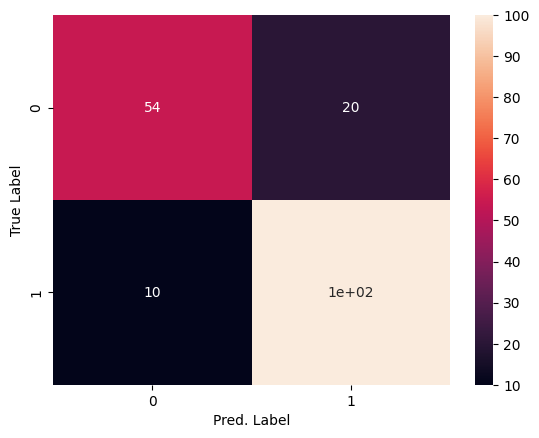

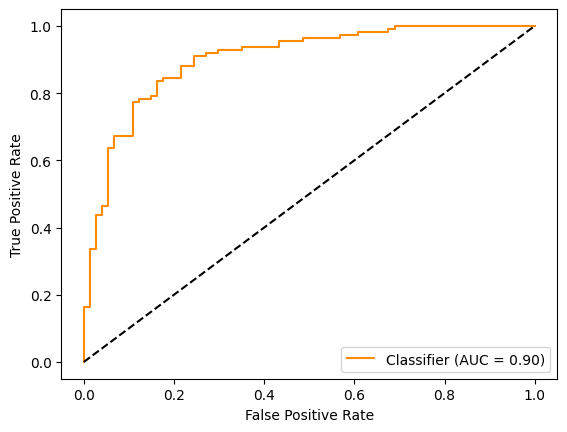

In [342]:
# Predicting
y_pred_prob = model(torch.tensor(X_test.values, dtype=torch.float)).detach().numpy()
y_pred = np.round(y_pred_prob)

# precision, recall, f1, ...
print(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=["HD=0", "HD=1"]))

# confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Pred. Label")
plt.ylabel("True Label")

# ROC curve
RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred_prob,
    color = "darkorange",)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## **Challenge 1: Neural Additive Models**

The following was adapted from the following tutorial:

https://towardsdatascience.com/interpretable-neural-networks-with-pytorch-76f1c31260fe

***Step 1:*** we define a so called "block layer", which creates "n_blocks" different *unconnected* blocks. Since we want to keep all features fully separate, we intend to set *n_blocks* to the no. of features.

In [291]:
class BlockLinear(torch.nn.Module):
    def __init__(self, n_blocks, in_features, out_features):
        super().__init__()
        self.n_blocks = n_blocks
        self.in_features = in_features
        self.out_features = out_features
        self.block_weights = []
        self.block_biases = []
        for i in range(n_blocks):
            block_weight = torch.Tensor(out_features, in_features)
            block_weight = torch.nn.Parameter(block_weight)
            torch.nn.init.kaiming_uniform_(block_weight)
            self.register_parameter(
                f'block_weight_{i}',
                block_weight
            )
            self.block_weights.append(block_weight)
            block_bias = torch.Tensor(out_features)
            block_bias = torch.nn.Parameter(block_bias)
            bound = 1 / math.sqrt(in_features)
            torch.nn.init.uniform_(block_bias, -bound, bound)
            self.register_parameter(
                f'block_bias_{i}',
                block_bias
            )
            self.block_biases.append(block_bias)

    def forward(self, x):
        block_size = x.size(1) // self.n_blocks
        x_blocks = torch.split(
            x,
            split_size_or_sections=block_size,
            dim=1
        )
        block_outputs = []
        for block_id in range(self.n_blocks):
            block_outputs.append(
                x_blocks[block_id] @ self.block_weights[block_id].t() + self.block_biases[block_id]
            )
        return torch.cat(block_outputs, dim=1)

***Step 2:*** define model

In [307]:
class Model(torch.nn.Module):
    def __init__(self, width, p_drop):
        super().__init__()
        
        self.features = torch.nn.Sequential(
            BlockLinear(22, 1, width),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(p=p_drop),
            BlockLinear(22, width, width),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(p=p_drop),
            BlockLinear(22, width, 1),
        )
        
        self.lr = torch.nn.Linear(22, 1)
        self.sm = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.features(x)
        x = self.lr(x)
        x = self.sm(x)
        return x

***Step 3:*** train the model

In [318]:
width = 10
p_drop = 0.3

model = Model(width, p_drop)

In [319]:
X = torch.tensor(X_train.values, dtype=torch.float)
y = torch.tensor(y_train.values, dtype=torch.float)
y = y.reshape(-1, 1)

In [320]:
torch.manual_seed(0)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCELoss()

for i in range(1001):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred+1e-10, y)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
      acc = np.mean(np.round(y_pred.detach().numpy())==y.detach().numpy())
      print("Ep.", i, "; Train Acc =", np.round(100*acc, 1), "%")

Ep. 0 ; Train Acc = 47.4 %
Ep. 100 ; Train Acc = 80.1 %
Ep. 200 ; Train Acc = 85.6 %
Ep. 300 ; Train Acc = 85.0 %
Ep. 400 ; Train Acc = 85.7 %
Ep. 500 ; Train Acc = 87.1 %
Ep. 600 ; Train Acc = 86.8 %
Ep. 700 ; Train Acc = 88.8 %
Ep. 800 ; Train Acc = 86.4 %
Ep. 900 ; Train Acc = 86.9 %
Ep. 1000 ; Train Acc = 88.3 %


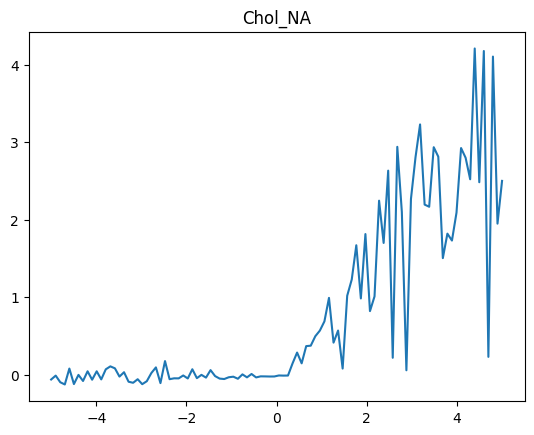

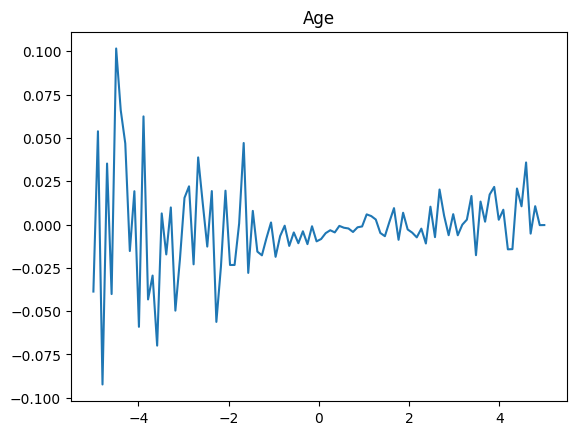

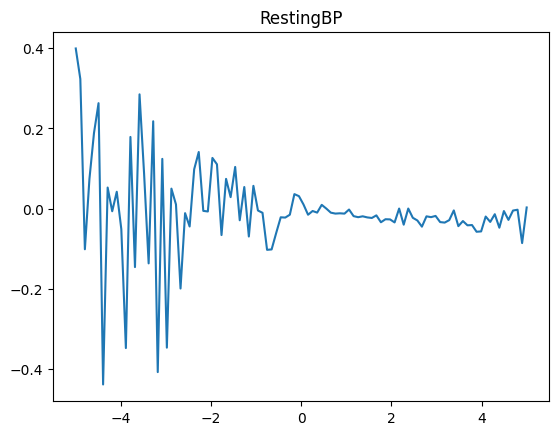

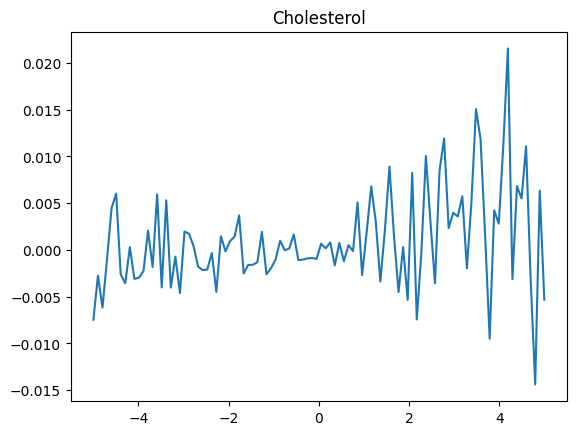

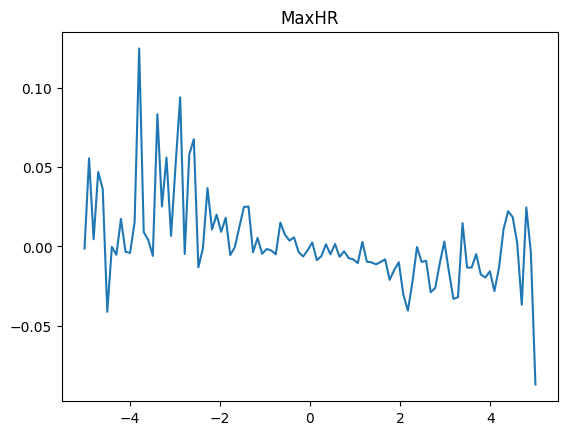

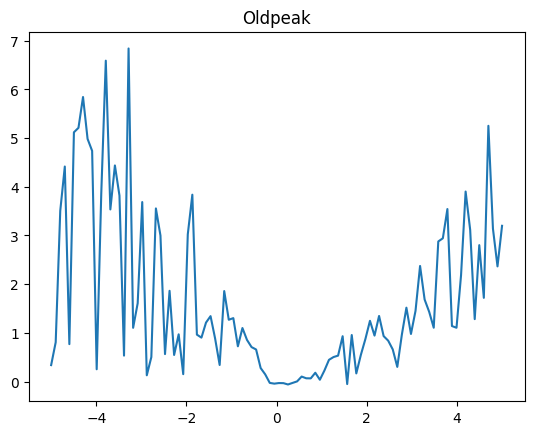

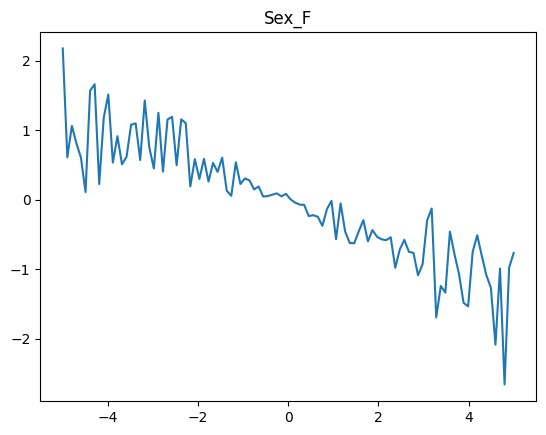

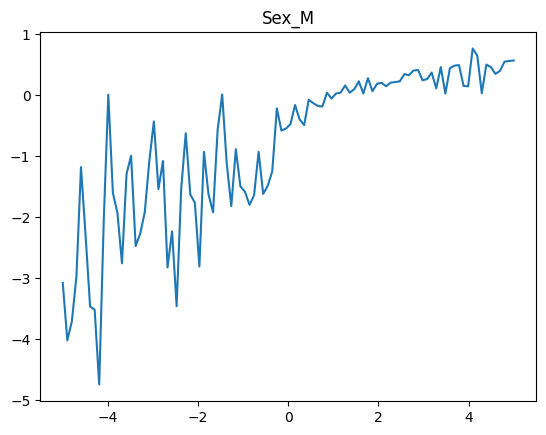

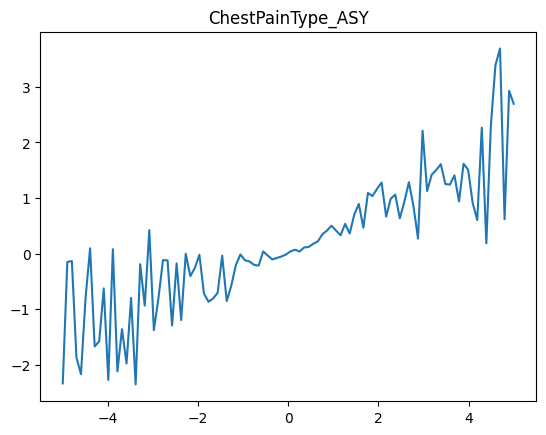

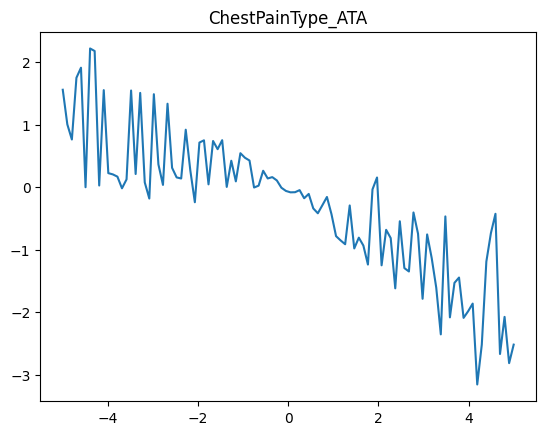

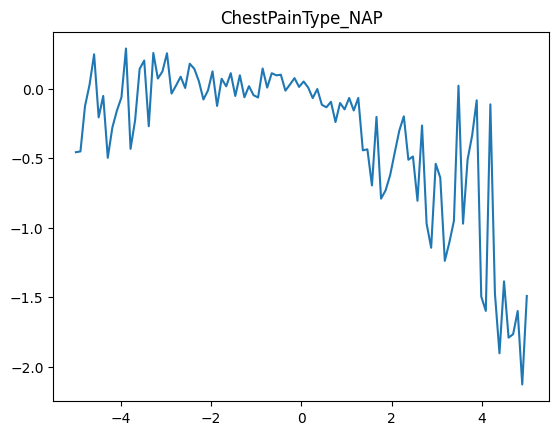

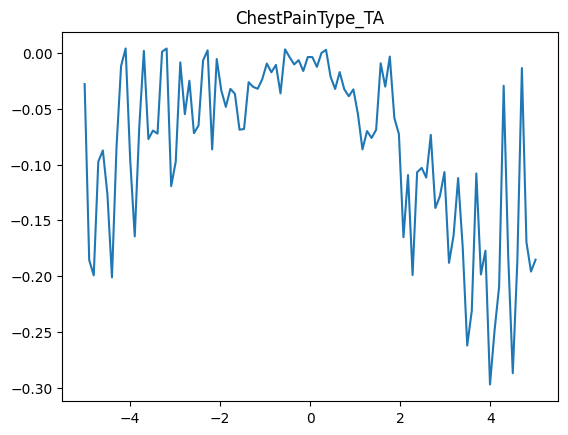

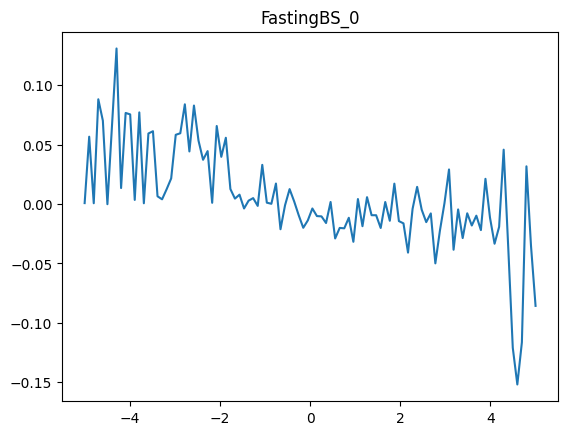

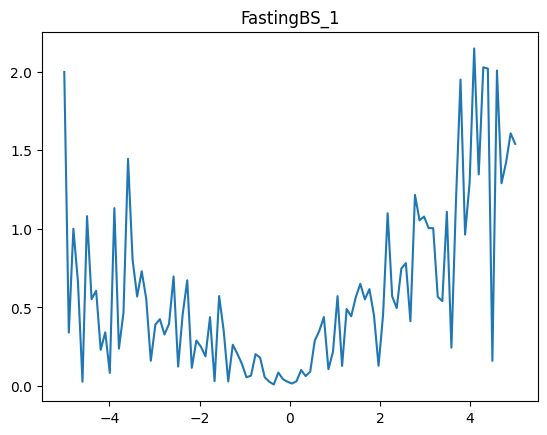

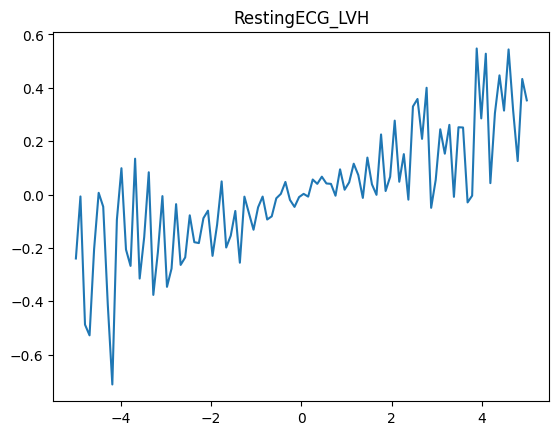

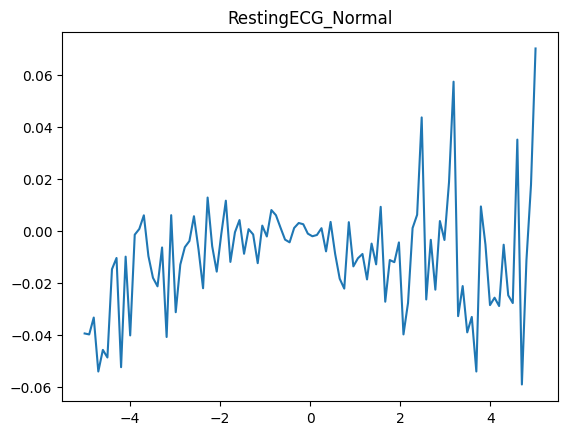

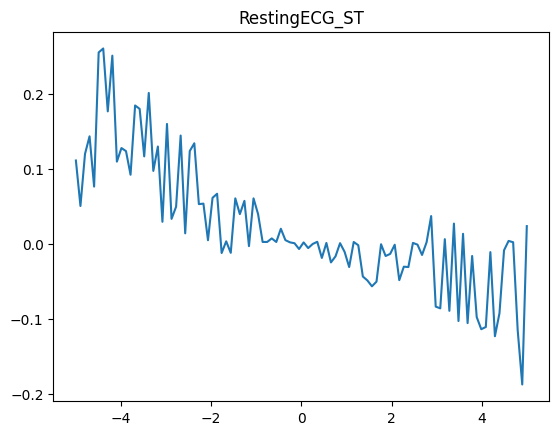

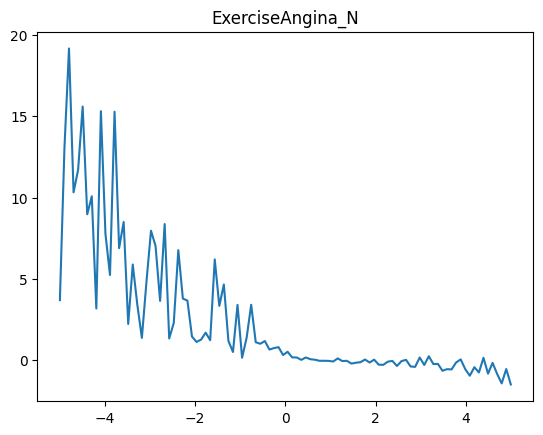

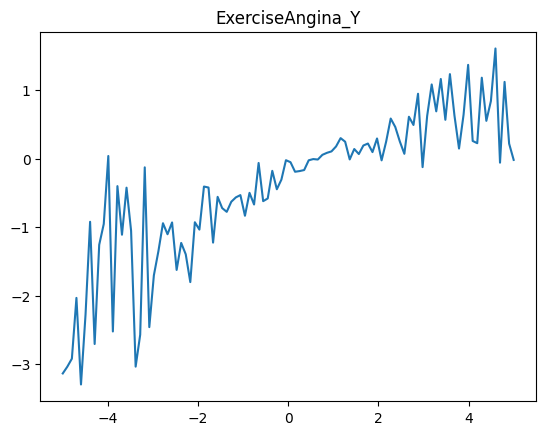

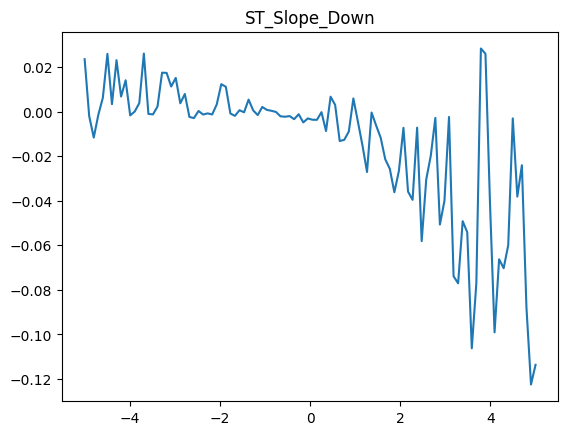

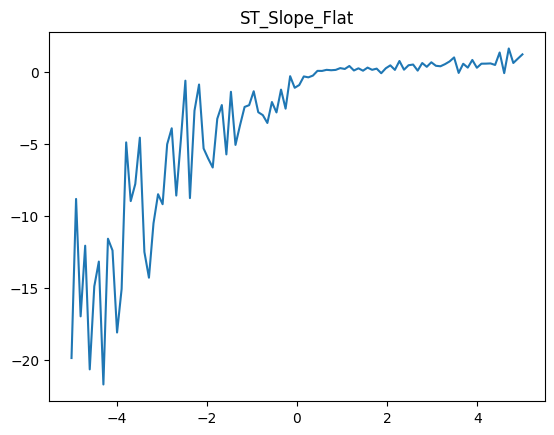

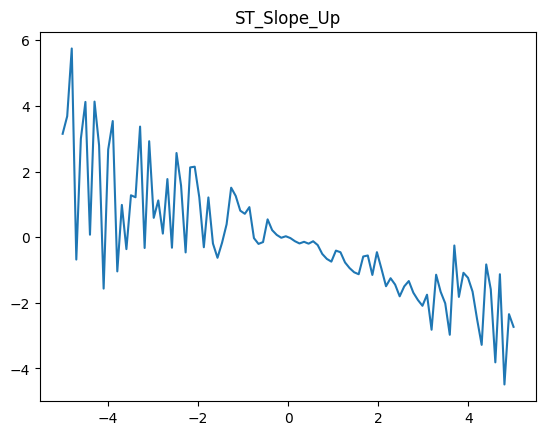

In [321]:
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100).reshape(-1, 1)
x = torch.hstack(22*[x])

for i in range(22):
    plt.plot(
        x[:, 0].detach().numpy(),
        model.get_submodule('lr').weight[0][i].item() * model.get_submodule('features')(x)[:, i].detach().numpy())
    plt.title(ft_names[i])
    plt.show()

## Model Performance

              precision    recall  f1-score   support

        HD=0       0.80      0.77      0.79        74
        HD=1       0.85      0.87      0.86       110

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



Text(0, 0.5, 'True Positive Rate')

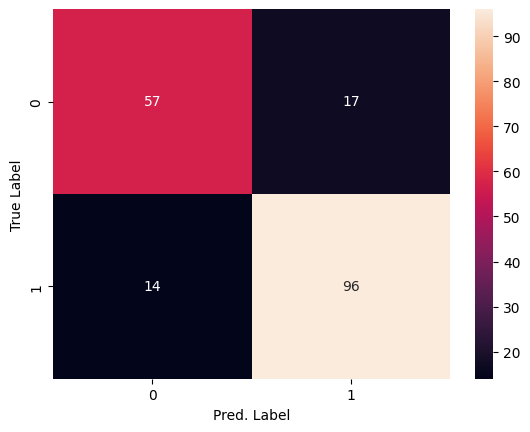

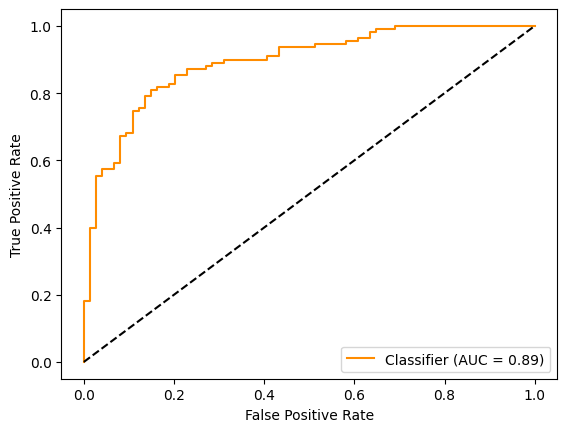

In [322]:
# get predictions
y_pred_prob = model(torch.tensor(X_test.values, dtype=torch.float)).detach().numpy()
y_pred = np.round(y_pred_prob)

# precision, recall, f1, ...
print(classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names=["HD=0", "HD=1"]))

# confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Pred. Label")
plt.ylabel("True Label")

# ROC curve
RocCurveDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred_prob,
    color = "darkorange",)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")